In [3]:
%matplotlib inline

import os
import math
import numpy as np
import imageio
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2
from PIL import Image, ImageFont, ImageDraw

import pytesseract
# The tesseract executable path
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
from art.estimators.classification import BlackBoxClassifier
from art.defences.preprocessor import JpegCompression
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

In [5]:
init_wordList = ['accurate', 'appear', 'approve', 'advantage', 'courteous', 'can']
target_wordList = ['inaccurate', 'disappear', 'disapprove', 'disadvantage', 'discourteous', 'cant']

word_dict = {'accurate' : 'inaccurate', 'appear' : 'disappear', 'approve' : 'disapprove', 'advantage' : 'disadvantage', 'courteous' : 'discourteous', 'can' : 'cant'}

In [6]:
counter = 0

In [9]:
def create_OCR_image(text):
    image_size = (28, 28)
    img_colour = (255, 255, 255)
    img = Image.new('RGB', image_size, color=img_colour)
    image_editable = ImageDraw.Draw(img)
    text_colour = (0, 0, 0)
    text_font_size = 28
    text_font = ImageFont.truetype('./fonts/Raleway-Bold.ttf', text_font_size)
    image_editable.text((0,0), text, fill=text_colour, font=text_font)
    img = np.array(img)
    plt.imshow(img)
    return img

def predict(x):
    global counter
    out_label = []
    for x_i in x:
        x_i = x_i.astype(np.uint8)
        out_string = pytesseract.image_to_string(x_i).strip()
#         print('`'+out_string+'`')
        if out_string:
            out_string = out_string.split()[0]
        if out_string == target_wordList[counter]:
            out_label.append(0)
        elif out_string == init_wordList[counter]:
            out_label.append(1)
        else:
            out_label.append(2)
    out_label_cat = to_categorical(out_label, 3)
    return out_label_cat

def predict_text(model, image, label_dict):
    plt.imshow(image[:,:,0])
    plt.show()
    image_lst = np.array([image], dtype=np.float32)
    out_label_cat = model.predict(image_lst)
    print(label_dict[np.argmax(out_label_cat)])
    
def create_mask(model, image_init, image_target, label_dict):
    global counter
    attack = HopSkipJump(classifier=model, targeted=True, norm=2, max_iter=0, max_eval=1000, init_eval=10)
    iter_step = 10
    l2_error_lst = []
    x_adv = np.array([image_init], dtype=np.float32)
    for i in range(15):
        x_adv = attack.generate(x=np.array([image_target], dtype=np.float32), x_adv_init=x_adv, y=to_categorical([1], 3))
        l2_error = np.linalg.norm(np.reshape(x_adv[0]-image_target,[-1]))
        l2_error_lst.append(l2_error)
        print("Adversarial image at step %d." % (i*iter_step))
        print("L2 error: %.6f" %l2_error)
        print("Tesseract output is: %s." % label_dict[np.argmax(model.predict(x_adv)[0])])
        plt.imshow(x_adv[0,:,:,0])
        plt.show(block=False)
        attack.max_iter = iter_step
        if i>=1 and abs(l2_error_lst[-2]-l2_error_lst[-1])/l2_error_lst[-2]<0.01:
            break
    counter = counter + 1
    return x_adv, l2_error_lst

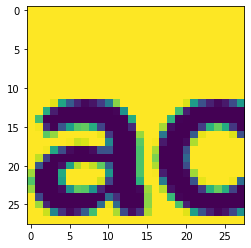

other


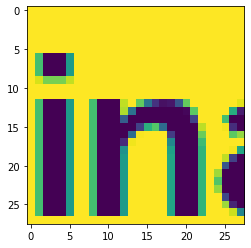

other


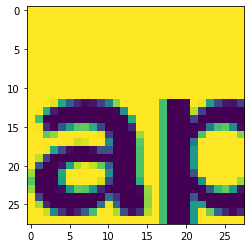

other


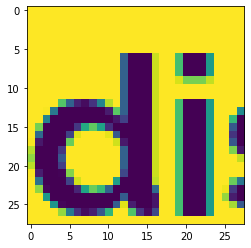

other


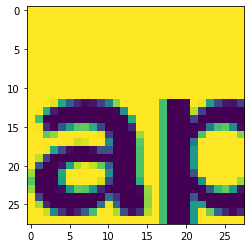

other


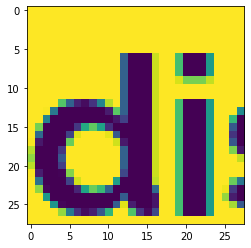

other


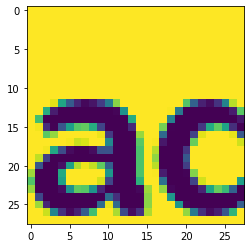

other


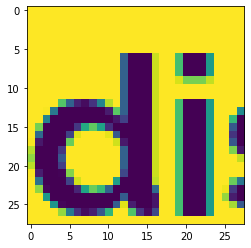

other


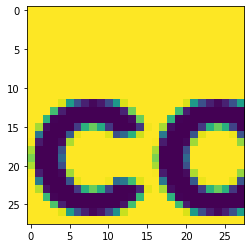

other


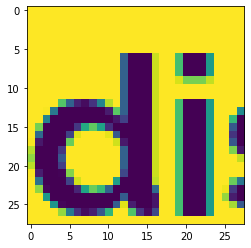

other


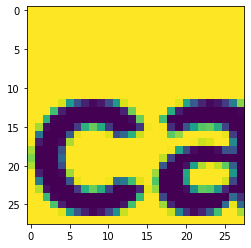

other


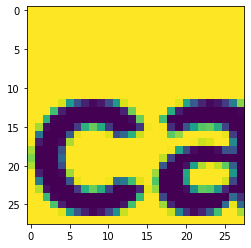

other


In [10]:
init_word_list = []
target_word_list = []
label_dict_list = []
image_init_list = []
image_target_list = []

for key,value in word_dict.items():
    init_word_list.append(key)
    target_word_list.append(value)
    label_dict = {0: value, 1: key, 2: 'other'}
    label_dict_list.append(label_dict)
    image_init = create_OCR_image(key)
    image_target = create_OCR_image(value)
    
    image_init_list.append(image_init)
    image_target_list.append(image_target)
    
for idx,val in enumerate(init_wordList):
    counter = idx
    model = BlackBoxClassifier(predict, image_target_list[idx].shape, 3, clip_values=(0,255))
    predict_text(model, image_init_list[idx], label_dict_list[idx])
    predict_text(model, image_target_list[idx], label_dict_list[idx])


#
#for key in word_dict:
#    #Text that you want the model to read
#    init_word.append(key)
#    #Text that you want to show on the image
#    target_word = word_dict[key]
#    label_dict = {0: target_word, 1: init_word, 2: 'other'}

#    image_init = create_OCR_image(init_word)
#    image_target = create_OCR_image(target_word)


#    model = BlackBoxClassifier(predict, image_target.shape, 3, clip_values=(0, 255))
#    predict_text(model, image_init, label_dict)
#    predict_text(model, image_target, label_dict)

#print(init_word)
#"""

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0.
L2 error: 13389.949219
Tesseract output is: accurate.


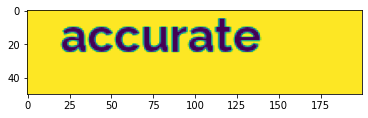

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10.
L2 error: 9448.093750
Tesseract output is: accurate.


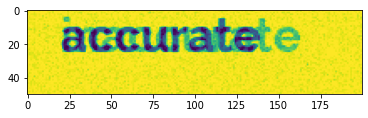

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20.
L2 error: 9294.575195
Tesseract output is: accurate.


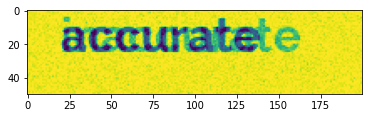

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30.
L2 error: 9267.163086
Tesseract output is: accurate.


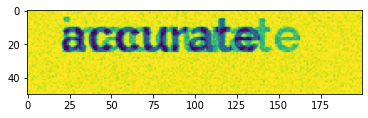

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0.
L2 error: 13750.892578
Tesseract output is: appear.


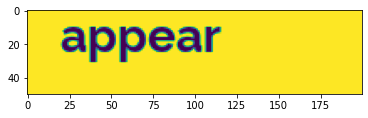

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10.
L2 error: 9054.605469
Tesseract output is: appear.


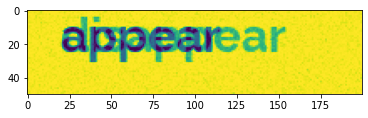

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20.
L2 error: 9024.281250
Tesseract output is: appear.


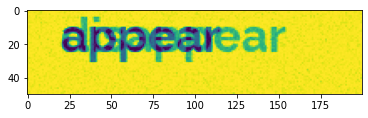

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0.
L2 error: 14630.515625
Tesseract output is: approve.


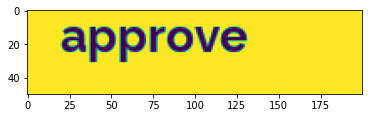

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10.
L2 error: 9217.086914
Tesseract output is: approve.


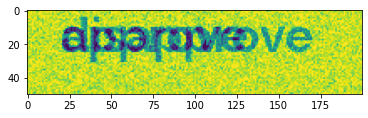

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20.
L2 error: 9443.366211
Tesseract output is: approve.


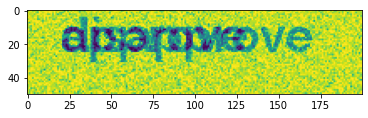

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30.
L2 error: 9417.434570
Tesseract output is: approve.


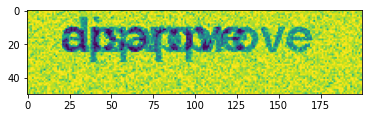

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0.
L2 error: 16028.952148
Tesseract output is: advantage.


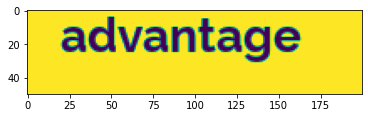

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10.
L2 error: 10085.874023
Tesseract output is: advantage.


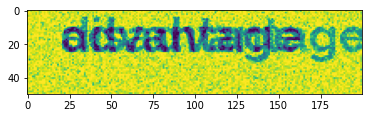

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20.
L2 error: 9855.568359
Tesseract output is: advantage.


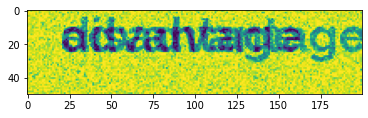

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30.
L2 error: 9833.421875
Tesseract output is: advantage.


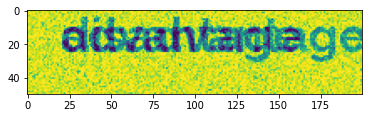

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0.
L2 error: 14578.904297
Tesseract output is: courteous.


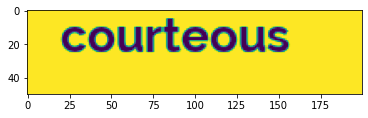

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10.
L2 error: 8904.877930
Tesseract output is: courteous.


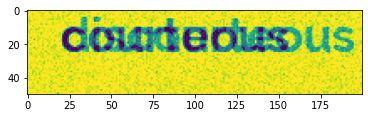

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20.
L2 error: 9351.300781
Tesseract output is: courteous.


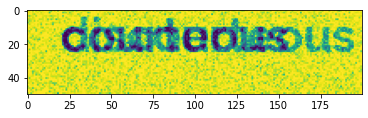

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30.
L2 error: 9558.603516
Tesseract output is: courteous.


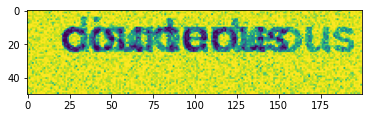

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40.
L2 error: 9521.080078
Tesseract output is: courteous.


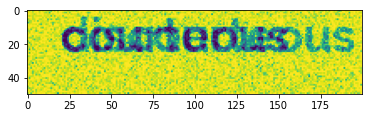

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0.
L2 error: 4186.825195
Tesseract output is: can.


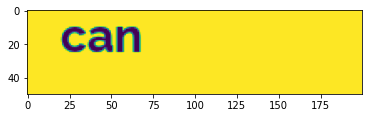

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10.
L2 error: 2611.681152
Tesseract output is: can.


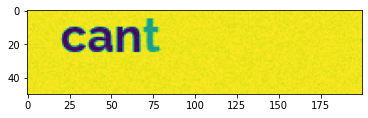

HopSkipJump:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20.
L2 error: 2616.661865
Tesseract output is: can.


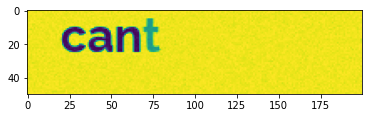

In [54]:
counter = 0
for idx,val in enumerate(init_wordList):
    adv_img, l2_error_lst = create_mask(model, image_init_list[idx], image_target_list[idx], label_dict_list[idx])

After perturbation


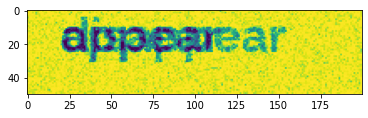

Tesseract output: appearcar



In [6]:
# Verify

adv_img_copy = adv_img.astype(np.uint8)
plt.imshow(adv_img_copy[0,:,:,0])
print('After perturbation')
plt.show()
print("Tesseract output: "+pytesseract.image_to_string(adv_img_copy[0,:,:,0]))